# Guild correlation heatmaps 

Code module needs work, some workflows to be wrapped, functions to be renamed & made more flexible, etc.

## 1) import data sets & modules
- Note correlations here are at OTU level, and filtering step for that.
- Modules currently last due to glitch...

####  Silva

In [1]:
# read pre-processed OTU & metadata, including site colors
source("../modules/Import_Silva_OTU_data4plots_v0.1.R")

In [3]:
# Taxonomy colors 
Taxons3d <- read.table("../data/colors/Silva_taxonomy_color_pallete.txt", sep="\t", header = T)

In [4]:
# Pre-calculated correlation grid -- here at OTU level...
# CH4corrRanksOTU <- read.table("../taxon_analysis/correlations/CH4corrRanks_SilvaOTU.txt", sep = '\t')

# use DELTA only sites, genus
CH4corrRanks <- read.table("../taxon_analysis/correlations/CH4corrRanks_Silva_Delta_genus.txt", sep = '\t')

In [5]:
# CH4corrRanksOTU

#### iTagger

In [6]:
# source("../modules/Import_iTagger_OTU_data4plots_v0.1.R")  -- preprocessed OTU & metadata

In [7]:
# Taxonomy colors 
# Taxons3d <-read.table("../data/colors/Test_taxonomy_color_pallete.txt", sep="\t", header = T)

In [8]:
# Pre-calculated correlation grid -- here at OTU level...
# CH4corrRanksOTU <- read.table("../taxon_analysis/correlations/CH4corrRanks_iTaggerOTU.txt", sep = '\t')

In [9]:
# Original corr ranks - for testing
# CH4corrRanksOTU <- read.table("../taxon_analysis/correlations/CH4_TaxRankOTU_corr_tab_all_sites.txt",
#                               header = T, sep = '\t')

# Delta
#  CH4corrRanksOTU <- read.table("../taxon_analysis/correlations/CH4_TaxRankOTU_corr_tab_Delta_sites.txt", 
#                                      header = T, sep = '\t')

#### modules

In [59]:
# Import other modules
source("../modules/3_OTU_subsetting_modules_v.0.4_strip.r")
source("../modules/5_OTU_barplots_module_v0.4.R")
source("../modules/7_Corr_heatmap_module_v0.1.R")

# Get INCOMPLETE guild heatmap module
source("../modules/8_Guild_corr_heatmaps_v0.0.r")

## 2) data filtering - get guilds

In [26]:
# Get guilds from OTU table (or just import them?)
Guild_OTUs <- Get_16S_Guilds(otu_V)

In [27]:
# drop OTU level data --- or heatmap will never render (still here though?)  more testing?
#CH4corrRanks <-CH4corrRanksOTU[,1:(ncol(CH4corrRanksOTU)-1)]           # if need be, drop OTU data for unique at genus / Consensus.lineage
# Tax_corrU <- unique(CH4corrRanks)            

In [28]:
 #Tax_corrU

# set cutoff filter for plotting ! 
- again, need better wrappers here
- typically would be to limit number of rows in fig. legend.
- function from subsetting module.

In [29]:
Corr_filt_r <- unique(corrRanks_filt(CH4corrRanks, "Genus", 0.5))  
# Corr_filt_r <- unique(corrRanks_filt(Tax_corrU, "Genus", 0.5))  

## 3) data processing
- needs better encapsulation
- and it could just be made function here.

In [30]:
# use several functions in the Guild_corr_heatmaps module:
# module not fully completed / encapsulated

# a) Combine guild & color data
# - note sort_tax and agg_tax are defaults to sort on, and level of aggregation used
Guild_bar_dU <- Guild_color_data(Guild_OTUs, Guild_colors, otu_V, sort_tax ="Consensus.lineage", agg_tax="Genus")
# head(Guild_bar_dU)

# b) Merge guild color & TaxCorr object  ( or filtered one )
Corr_filt_Guild_d <- Guild_corr_d(Guild_bar_dU, Corr_filt_r)  
# Corr_Guild_d <- Guild_corr_d(Guild_bar_dU, Tax_corrU)         # if not correlation filtered

# c) Filter results (drops NAs)  
Corr_filt_Guild_Gd <- filter_corr_guild_data(Corr_filt_Guild_d)


## 4) make Guild heatmap plots
- can adjust n taxa with correlation cutoff, or by plot size
- did not resolve how to add site color bar to complex heatmap, two separate plots to composite later.

In [31]:
 heat_cols <- grey_red # was this defined in 

Using Genus as id variables



pdf 
  2

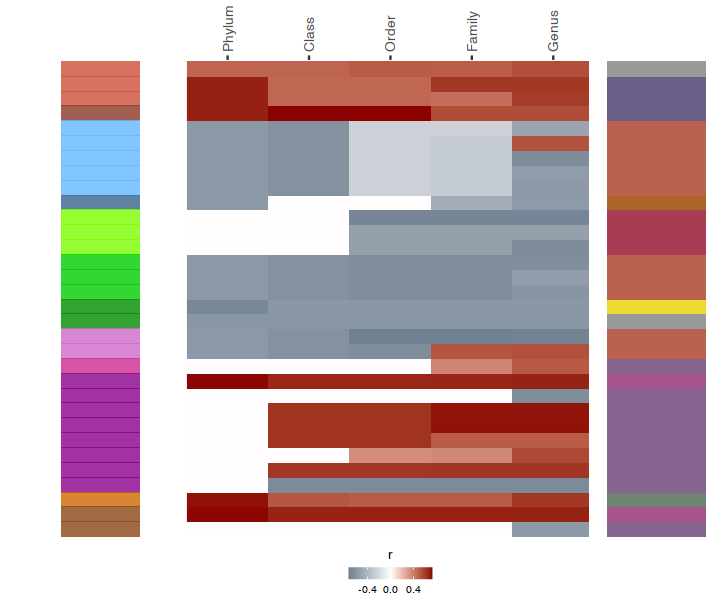

In [72]:
# Reload
source("../modules/7_Corr_heatmap_module_v0.1.R")
source("../modules/8_Guild_corr_heatmaps_v0.0.r")

# Main guild heatmap, with taxa & log2 abundance at each site
options(repr.plot.width=6, repr.plot.height=5) 

figureS9a <- plot_guild_corr_tax_heat_abund(Taxons3d, Corr_filt_Guild_Gd, Tax_corrU_r, heat_cols)
figureS9a

pdf("../figs/FigureS9a.pdf", width = 3, height = 5)
figureS9a
dev.off()

Using Genus as id variables



pdf 
  2

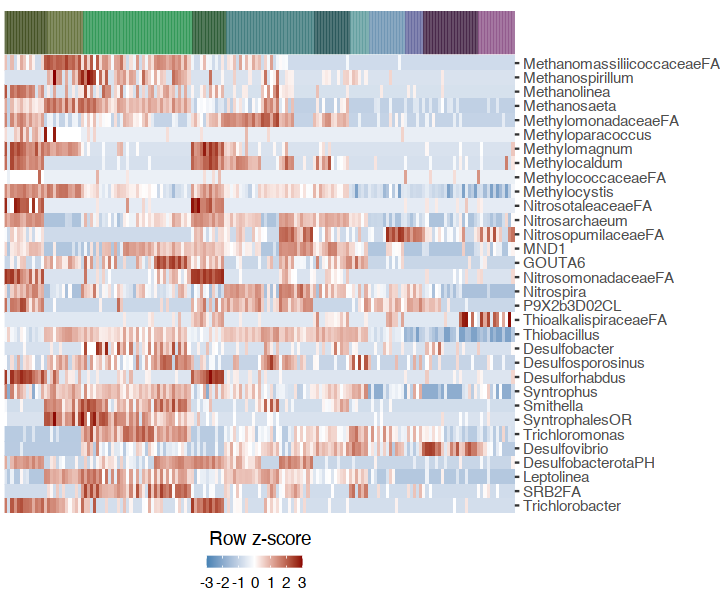

In [74]:
# same abundance data with site colorbar
# may wish to adapt both to sort, etc.  
# did not succeed in compositing with cowplot/plotgrid, was getting there...
source("../modules/7_Corr_heatmap_module_v0.1.R")
source("../modules/8_Guild_corr_heatmaps_v0.0.r")
options(repr.plot.width=6, repr.plot.height=5)

figureS9b <- plot_guild_log2_abund_site_colorbar(otu_V, Meta_iTag, site_colors, Corr_filt_Guild_Gd)
figureS9b

pdf("../figs/FigureS9b.pdf", width = 6, height = 5.24)
figureS9b
dev.off()